In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [29]:
df= pd.read_csv('crop_dataset.csv')

In [30]:
df.head()

,Unnamed: 0,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Annual_Rainfall
0,0,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,625.5
1,1,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,904.5
2,2,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,1359.7
3,3,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,600.6
4,4,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,799.3


In [31]:
df.drop(columns='Unnamed: 0',inplace=True)

In [32]:
df.head()

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Annual_Rainfall
0,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,625.5
1,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,904.5
2,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,1359.7
3,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,600.6
4,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,799.3


In [33]:
df['Crop_Type'].value_counts()

Crop_Type
Wheat        3652
Corn         3652
Rice         3652
Barley       3652
Cotton       3652
Sugarcane    3652
Tomato       3652
Potato       3652
Mustard      3652
Mango        3652
Banana       3652
Name: count, dtype: int64

C:\Users\shikh\AppData\Local\Temp\ipykernel_14696\2106577960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Crop_Type", order=df["Crop_Type"].value_counts().index, palette="viridis")


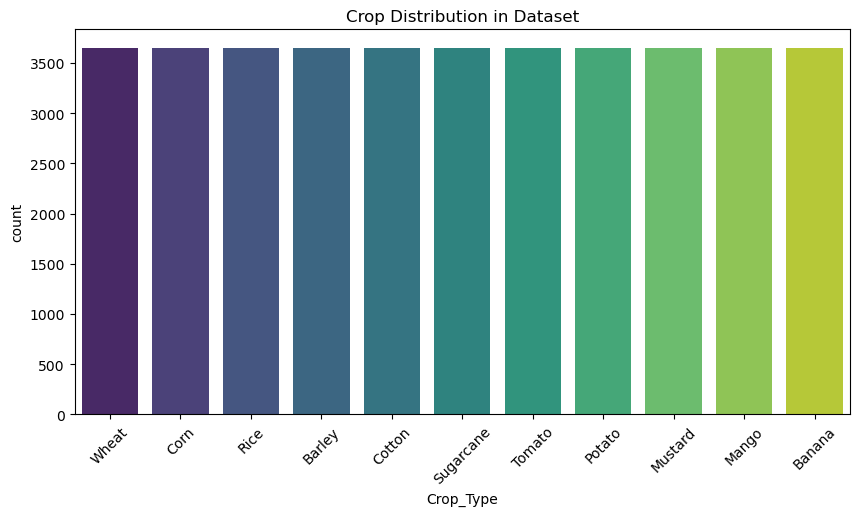

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Crop_Type", order=df["Crop_Type"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Crop Distribution in Dataset")
plt.show()

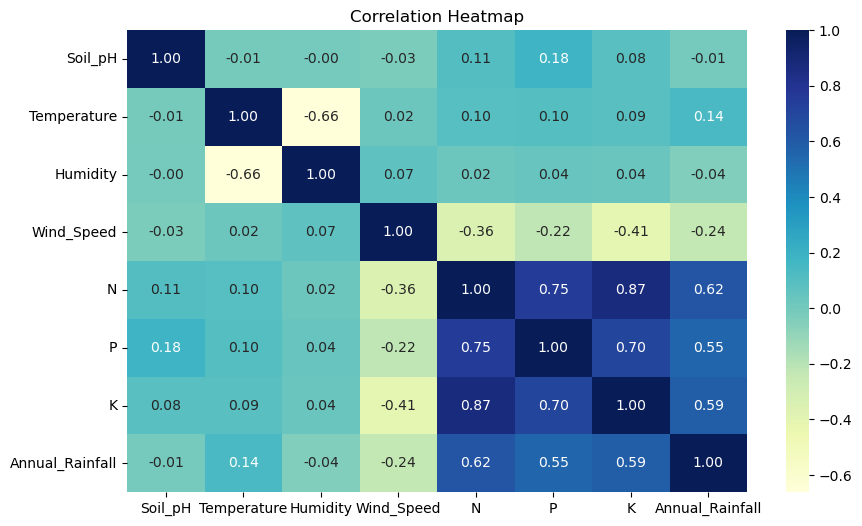

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\shikh\AppData\Local\Temp\ipykernel_14696\4243807912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Crop_Type", y="Annual_Rainfall", palette="Set2")


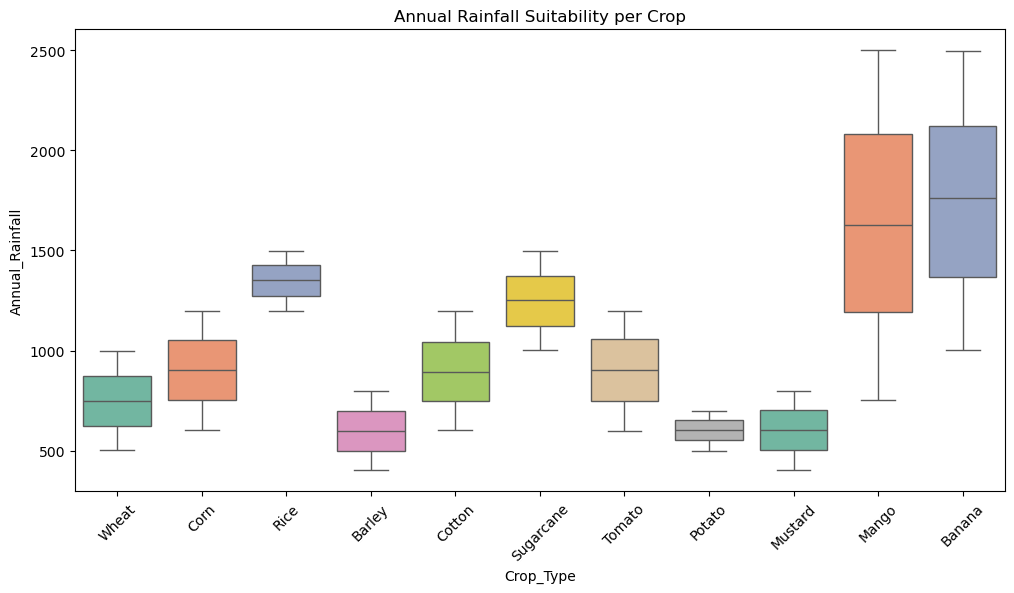

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Crop_Type", y="Annual_Rainfall", palette="Set2")
plt.xticks(rotation=45)
plt.title("Annual Rainfall Suitability per Crop")
plt.show()

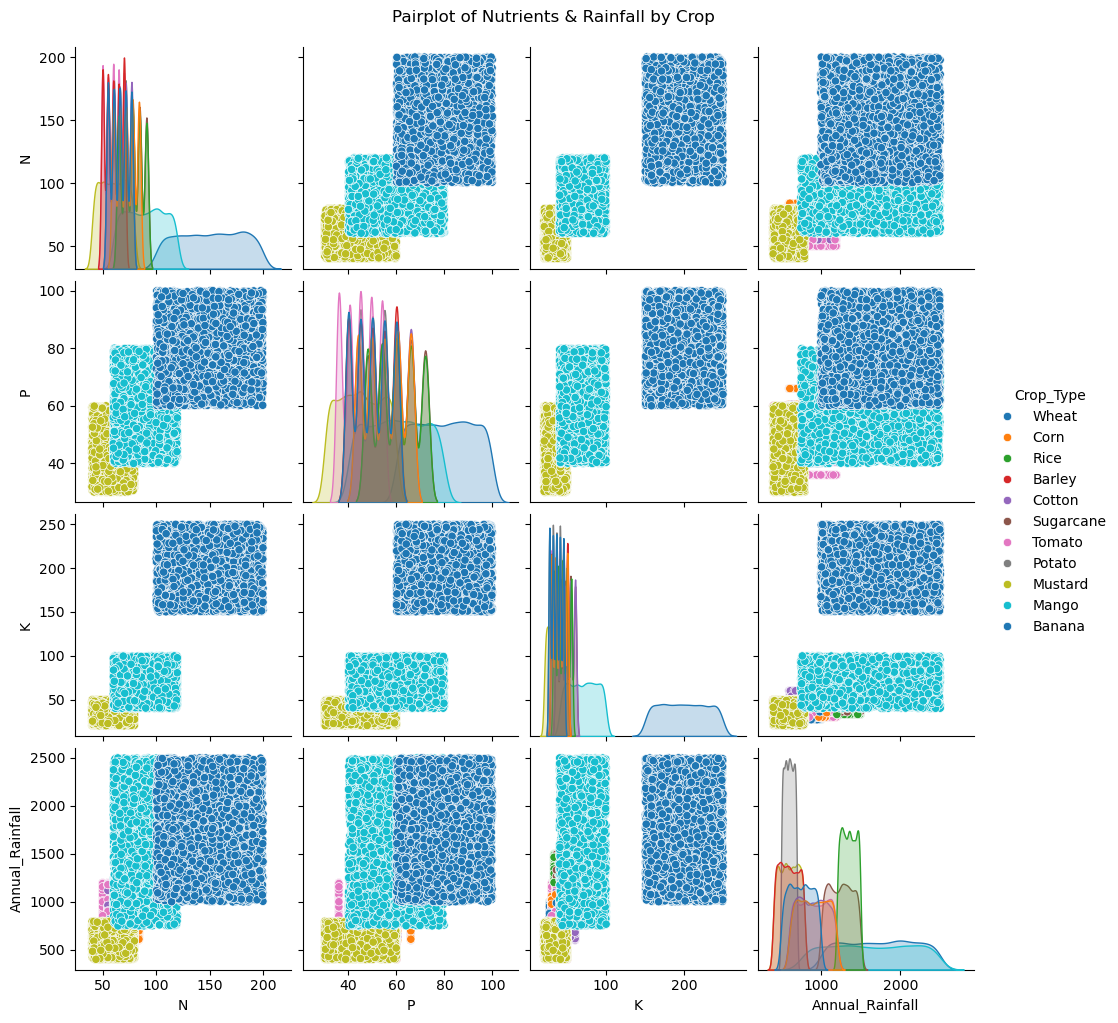

In [37]:
sns.pairplot(df[["N","P","K","Annual_Rainfall","Crop_Type"]], hue="Crop_Type", palette="tab10")
plt.suptitle("Pairplot of Nutrients & Rainfall by Crop", y=1.02)
plt.show()

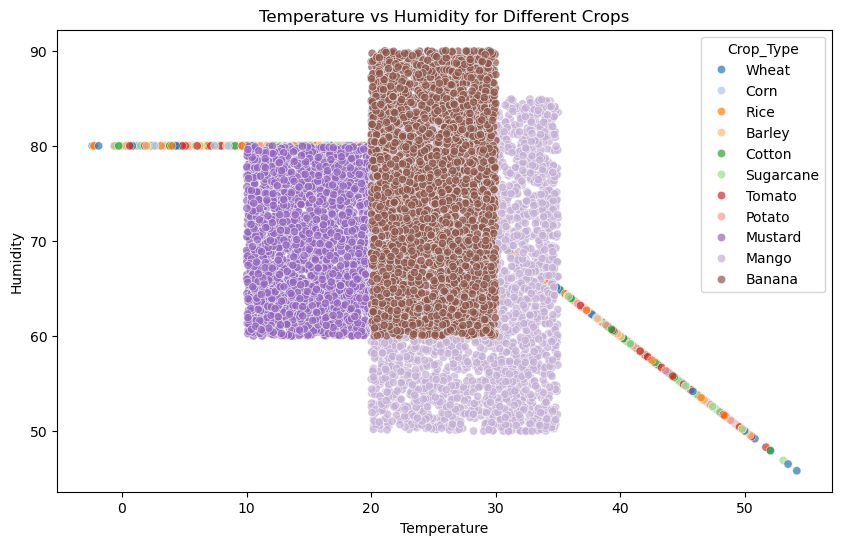

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Temperature", y="Humidity", hue="Crop_Type", palette="tab20", alpha=0.7)
plt.title("Temperature vs Humidity for Different Crops")
plt.show()

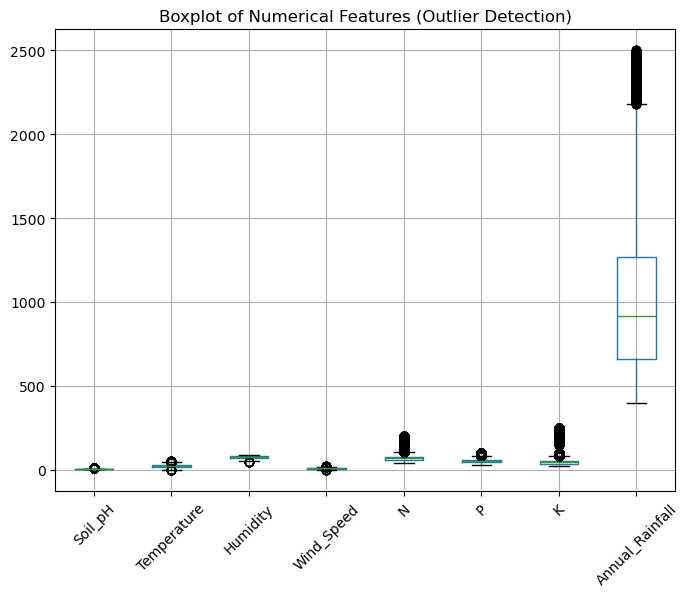

In [39]:
plt.figure(figsize=(8,6
                    ))
df.select_dtypes(include="number").boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.show()

In [40]:
X=df.iloc[:,1:-1]
Y=df['Crop_Type']

In [41]:
X

,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K
0,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5
1,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0
2,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5
3,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0
4,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0
...,...,...,...,...,...,...,...,...
40167,Loamy,6.52,20.980000,85.910000,2.460000,167.8,96.8,155.8
40168,Loamy,6.36,25.040000,65.820000,6.120000,199.7,60.2,170.6
40169,Loamy,7.16,23.400000,60.200000,2.220000,116.8,90.3,179.0
40170,Loamy,7.48,25.340000,83.680000,3.400000,172.4,92.2,169.8


In [42]:
Y

0         Wheat
1          Corn
2          Rice
3        Barley
4        Cotton
          ...  
40167    Banana
40168    Banana
40169    Banana
40170    Banana
40171    Banana
Name: Crop_Type, Length: 40172, dtype: object

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40172 entries, 0 to 40171
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop_Type        40172 non-null  object 
 1   Soil_Type        40172 non-null  object 
 2   Soil_pH          40172 non-null  float64
 3   Temperature      40172 non-null  float64
 4   Humidity         40172 non-null  float64
 5   Wind_Speed       40172 non-null  float64
 6   N                40172 non-null  float64
 7   P                40172 non-null  float64
 8   K                40172 non-null  float64
 9   Annual_Rainfall  40172 non-null  float64
dtypes: float64(8), object(2)
memory usage: 3.1+ MB


In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


df_encoded = df.copy()

soil_encoder = LabelEncoder()
df_encoded["Soil_Type"] = soil_encoder.fit_transform(df_encoded["Soil_Type"])


crop_encoder = LabelEncoder()
df_encoded["Crop_Type"] = crop_encoder.fit_transform(df_encoded["Crop_Type"])

X = df_encoded.drop("Crop_Type", axis=1)
y = df_encoded["Crop_Type"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (32137, 9)
Testing set shape: (8035, 9)


In [45]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40172 entries, 0 to 40171
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop_Type        40172 non-null  int32  
 1   Soil_Type        40172 non-null  int32  
 2   Soil_pH          40172 non-null  float64
 3   Temperature      40172 non-null  float64
 4   Humidity         40172 non-null  float64
 5   Wind_Speed       40172 non-null  float64
 6   N                40172 non-null  float64
 7   P                40172 non-null  float64
 8   K                40172 non-null  float64
 9   Annual_Rainfall  40172 non-null  float64
dtypes: float64(8), int32(2)
memory usage: 2.8 MB


In [46]:
df_encoded.head()

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Annual_Rainfall
0,10,3,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,625.5
1,2,2,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,904.5
2,7,3,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,1359.7
3,1,5,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,600.6
4,3,5,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,799.3


Accuracy: 0.9566894835096453

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       730
           1       1.00      1.00      1.00       730
           2       1.00      1.00      1.00       730
           3       1.00      1.00      1.00       731
           4       1.00      1.00      1.00       731
           5       1.00      1.00      1.00       730
           6       0.71      0.87      0.79       731
           7       1.00      1.00      1.00       731
           8       1.00      1.00      1.00       731
           9       1.00      1.00      1.00       730
          10       0.84      0.65      0.73       730

    accuracy                           0.96      8035
   macro avg       0.96      0.96      0.96      8035
weighted avg       0.96      0.96      0.96      8035



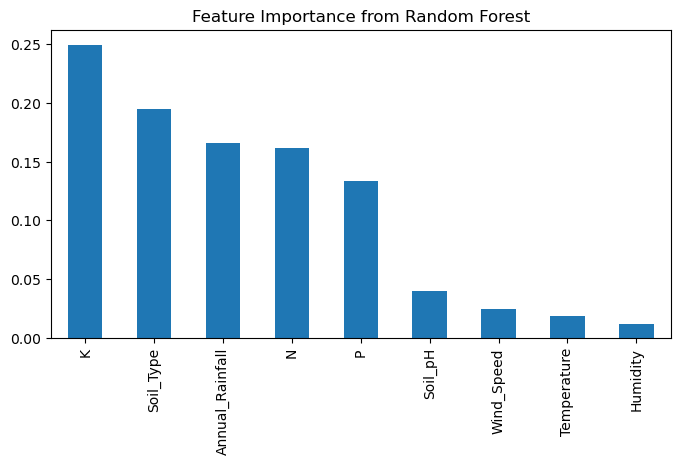

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42 ,n_jobs=-1)


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:", classification_report(y_test, y_pred))


feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind="bar", figsize=(8,4))
plt.title("Feature Importance from Random Forest")
plt.show()


In [48]:
train_accuracy = rf.score(X_train, y_train)
test_accuracy = rf.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.9566894835096453


Training Accuracy: 0.9636555994647914
Testing Accuracy: 0.9650280024891101

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       730
           1       1.00      1.00      1.00       730
           2       1.00      1.00      1.00       730
           3       1.00      1.00      1.00       731
           4       1.00      1.00      1.00       731
           5       1.00      1.00      1.00       730
           6       0.72      1.00      0.84       731
           7       1.00      1.00      1.00       731
           8       1.00      1.00      1.00       731
           9       1.00      1.00      1.00       730
          10       1.00      0.62      0.76       730

    accuracy                           0.97      8035
   macro avg       0.97      0.97      0.96      8035
weighted avg       0.97      0.97      0.96      8035



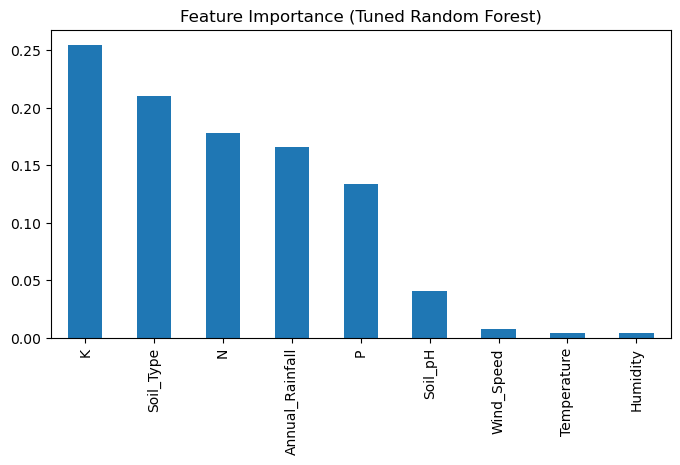

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)

train_acc = rf_tuned.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred_tuned)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

feat_importances = pd.Series(rf_tuned.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind="bar", figsize=(8,4))
plt.title("Feature Importance (Tuned Random Forest)")
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=15, min_samples_split=5, 
        min_samples_leaf=2, max_features="sqrt", random_state=42, n_jobs=-1
    ),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf", C=10, gamma=0.1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    results[name] = {"Train Accuracy": train_acc, "Test Accuracy": test_acc}
    
    print(f"{name} Train: {train_acc:.3f}, Test: {test_acc:.3f}")

print("\nSummary of Model Performance:")
for name, scores in results.items():
    print(f"{name}: Train={scores['Train Accuracy']:.3f}, Test={scores['Test Accuracy']:.3f}")


Random Forest Train: 0.964, Test: 0.965


c:\Users\shikh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Train: 0.826, Test: 0.830
KNN Train: 0.870, Test: 0.779
SVM Train: 0.999, Test: 0.557

Summary of Model Performance:
Random Forest: Train=0.964, Test=0.965
Logistic Regression: Train=0.826, Test=0.830
KNN: Train=0.870, Test=0.779
SVM: Train=0.999, Test=0.557


In [ ]:


xgb_tuned = XGBClassifier(
    n_estimators=500, max_depth=5,learning_rate=0.03,subsample=0.8,reg_alpha=0.1,reg_lambda=1,random_state=42,use_label_encoder=False,eval_metric="mlogloss"
)

In [ ]:

xgb_tuned.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False,
 
)

y_pred_xgb = xgb_tuned.predict(X_test)

train_acc = xgb_tuned.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred_xgb)

print("Tuned XGBoost Training Accuracy:", train_acc)
print("Tuned XGBoost Testing Accuracy:", test_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


c:\Users\shikh\sih25\crop_recommender\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:27:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuned XGBoost Training Accuracy: 0.9679497152814512
Tuned XGBoost Testing Accuracy: 0.9636589919103921

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       730
           1       1.00      1.00      1.00       730
           2       1.00      1.00      1.00       730
           3       1.00      1.00      1.00       731
           4       1.00      1.00      1.00       731
           5       1.00      1.00      1.00       730
           6       0.72      0.98      0.83       731
           7       1.00      1.00      1.00       731
           8       1.00      1.00      1.00       731
           9       1.00      1.00      1.00       730
          10       0.97      0.62      0.76       730

    accuracy                           0.96      8035
   macro avg       0.97      0.96      0.96      8035
weighted avg       0.97      0.96      0.96      8035



In [50]:
import joblib
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)
best_model.fit(X_train, y_train)

joblib.dump(best_model, "./backend/dist/random_forest_model.pkl")
joblib.dump(soil_encoder, "./backend/dist/soil_encoder.pkl")
joblib.dump(crop_encoder, "./backend/dist/crop_encoder.pkl")





['./backend/dist/crop_encoder.pkl']

In [51]:
X_train.columns

Index(['Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N',
       'P', 'K', 'Annual_Rainfall'],
      dtype='object')

In [52]:
new_data = {
    "Soil_Type": "Clay",      # <-- soil as name
    "Soil_pH": 6.5,
    "Temperature": 28,
    "Humidity": 70,
    "Wind_Speed": 5,
    "N": 80,
    "P": 40,
    "K": 50,
    "Annual_Rainfall": 200
}

# Convert to DataFrame
new_df = pd.DataFrame([new_data])

# Encode Soil_Type
new_df["Soil_Type"] = soil_encoder.transform(new_df["Soil_Type"])

# Reorder columns to match training
new_df = new_df[['Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
                 'Wind_Speed', 'N', 'P', 'K', 'Annual_Rainfall']]

# Predict
y_pred_num = model.predict(new_df)
y_pred_name = crop_encoder.inverse_transform(y_pred_num)

print("Predicted Crop:", y_pred_name[0])



Predicted Crop: Mango


In [54]:
model = joblib.load("./backend/dist/random_forest_model.pkl")
soil_encoder = joblib.load("./backend/dist/soil_encoder.pkl")
crop_encoder = joblib.load("./backend/dist/crop_encoder.pkl")
